In [88]:
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
import plotly.express as px
import plotly.graph_objects as go

In [89]:
shp_gdf = gpd.read_file('/Users/tejapeddi/Documents/geog582/data/archive/India States/Indian_states.shp') 

df = pd.read_csv('/Users/tejapeddi/Documents/geog582/data/archive/long_data_.csv')


In [90]:
shp_gdf.head()

st_nm                                           geometry
0  Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...
1        Arunanchal Pradesh  POLYGON ((96.16261 29.38078, 96.16860 29.37432...
2                     Assam  MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...
3                     Bihar  MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...
4                Chandigarh  POLYGON ((76.84147 30.75996, 76.83599 30.73623...

In [91]:
df.head()

States Regions   latitude  longitude                Dates  Usage
0     Punjab      NR  31.519974  75.980003  02/01/2019 00:00:00  119.9
1    Haryana      NR  28.450006  77.019991  02/01/2019 00:00:00  130.3
2  Rajasthan      NR  26.449999  74.639981  02/01/2019 00:00:00  234.1
3      Delhi      NR  28.669993  77.230004  02/01/2019 00:00:00   85.8
4         UP      NR  27.599981  78.050006  02/01/2019 00:00:00  313.9

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


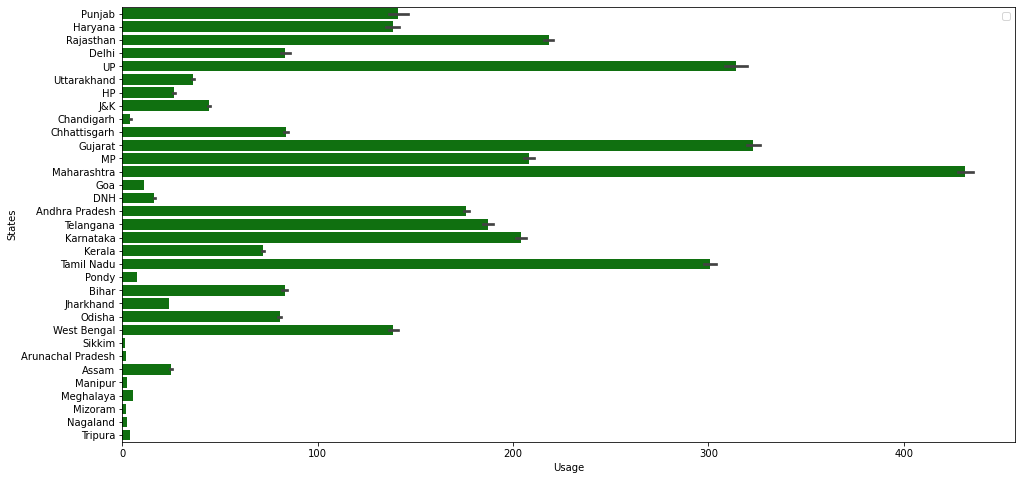

In [92]:
plt.figure(figsize=(16,8))
sns.barplot( x=df["Usage"], y=df["States"], color="green")
plt.legend()

In [94]:
fig = px.scatter_geo(df,'latitude','longitude', color="Regions",
                     hover_name="States", size="Usage",
                     animation_frame="Dates", scope='asia')
fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100])
fig.show()

In [95]:
df['Dates'] = pd.to_datetime(df['Dates'])

In [96]:
df.shape

(16599, 6)

In [97]:
df = df.groupby(df['Dates'], as_index = False).mean()
df.head()

Dates  latitude  longitude       Usage
0 2019-01-07  23.17822  81.794533  103.736364
1 2019-01-08  23.17822  81.794533  113.951515
2 2019-01-09  23.17822  81.794533  107.836364
3 2019-01-10  23.17822  81.794533   98.045455
4 2019-01-11  23.17822  81.794533   84.463636

In [98]:
df.shape

(498, 4)

In [99]:
df = df[['Dates','Usage']]

In [100]:
fig = px.line(df, x='Dates', y='Usage')
fig.show()

In [101]:
import requests

In [102]:
html = requests.get('https://en.wikipedia.org/wiki/Electricity_sector_in_India').text
df1 = pd.read_html(html)

In [103]:
dfx = df1[9]

In [104]:
dfx.head()

State/Union territory   Region  Per-capita consumption (kWh)  \
0  Dadra and Nagar Haveli  Western                         15517   
1           Daman and Diu  Western                          7561   
2                     Goa  Western                          2396   
3                 Gujarat  Western                          2388   
4            Chhattisgarh  Western                          2044   

   Total generation (TWh) Total consumption (TWh)  
0                     0.0                       6  
1                     NaN                     NaN  
2                     NaN                     NaN  
3                   126.5                   110.2  
4                   147.4                    44.7

In [105]:
dfx.replace(to_replace='Andhra Pradesh[76]',value='Andhra Pradesh',inplace=True)
dfx.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)
dfx.replace(to_replace='Dadra and Nagar Haveli',value='Dadara & Nagar Havelli',inplace=True)
dfx.replace(to_replace='Andaman and Nicobar Islands',value='Andaman & Nicobar Island',inplace=True)
dfx.replace(to_replace='Daman and Diu',value='Daman & Diu',inplace=True)
dfx.replace(to_replace='Jammu and Kashmir',value='Jammu & Kashmir',inplace=True)



In [106]:
dfx.drop('Region',axis = 'columns',inplace = True)
dfx.drop('Total generation (TWh)',axis = 'columns',inplace = True)
dfx.drop('Total consumption (TWh)',axis = 'columns',inplace = True)
dfx.drop(labels=36, axis=0)
dfx.drop(labels=0, axis=0)

State/Union territory  Per-capita consumption (kWh)
1                Daman & Diu                          7561
2                        Goa                          2396
3                    Gujarat                          2388
4               Chhattisgarh                          2044
5                Maharashtra                          1418
6             Madhya Pradesh                          1086
7                 Puducherry                          1752
8                 Tamil Nadu                          1844
9             Andhra Pradesh                          1507
10                 Telangana                          2071
11                 Karnataka                          1468
12                    Kerala                           823
13               Lakshadweep                           551
14                    Punjab                          2171
15                   Haryana                          2229
16                     Delhi                          1572
17          Himachal Pradesh                          1527
18               Uttarakhand                          1528
19                Chandigarh                           986
20           Jammu & Kashmir                          1384
21                 Rajasthan                          1317
22             Uttar Pradesh                           629
23                    Odisha                          1559
24                    Sikkim                           929
25                 Jharkhand                           853
26               West Bengal                           757
27  Andaman & Nicobar Island                           585
28                     Bihar                           332
29        Arunanchal Pradesh                           631
30                 Meghalaya                           861
31                   Mizoram                           629
32                  Nagaland                           367
33                   Tripura                           425
34                     Assam                           348
35                   Manipur                           385
36                  National                          1208

In [107]:
dfx=dfx.drop(labels=36, axis=0)

In [108]:
merge =shp_gdf.set_index('st_nm').join(dfx.set_index('State/Union territory'))

In [109]:
merge.head()

geometry  \
st_nm                                                                         
Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...   
Arunanchal Pradesh        POLYGON ((96.16261 29.38078, 96.16860 29.37432...   
Assam                     MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...   
Bihar                     MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...   
Chandigarh                POLYGON ((76.84147 30.75996, 76.83599 30.73623...   

                          Per-capita consumption (kWh)  
st_nm                                                   
Andaman & Nicobar Island                         585.0  
Arunanchal Pradesh                               631.0  
Assam                                            348.0  
Bihar                                            332.0  
Chandigarh                                       986.0

In [110]:
merge = merge.drop("Dadara & Nagar Havelli")
merge = merge.drop("Daman & Diu")


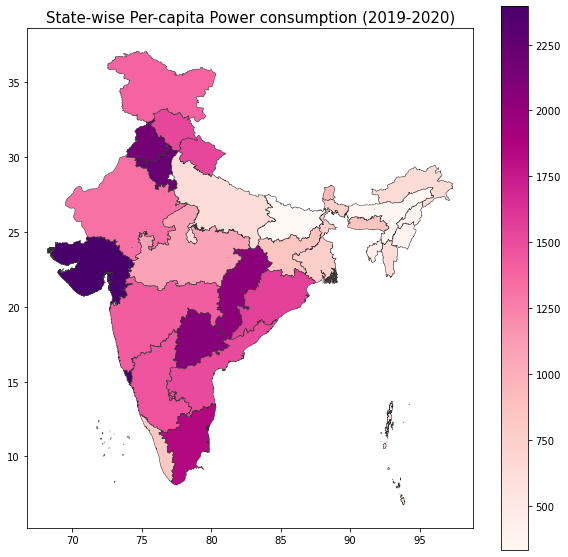

In [111]:
fig,ax=plt.subplots(1, figsize=(10,10))

ax.set_title('State-wise Per-capita Power consumption (2019-2020)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merge.plot(column='Per-capita consumption (kWh)', cmap='RdPu', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

In [112]:
df.head()

Dates       Usage
0 2019-01-07  103.736364
1 2019-01-08  113.951515
2 2019-01-09  107.836364
3 2019-01-10   98.045455
4 2019-01-11   84.463636

In [113]:
df.columns = ['ds','y']

In [114]:
df.head()

ds           y
0 2019-01-07  103.736364
1 2019-01-08  113.951515
2 2019-01-09  107.836364
3 2019-01-10   98.045455
4 2019-01-11   84.463636

In [115]:
model = Prophet()
model.fit(df)

23:34:57 - cmdstanpy - INFO - Chain [1] start processing
23:34:57 - cmdstanpy - INFO - Chain [1] done processing


In [116]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [117]:
future_dates = model.make_future_dataframe(periods=365,freq='d',include_history=True)
future_dates.shape

(863, 1)

In [118]:
future_dates.head()

ds
0 2019-01-07
1 2019-01-08
2 2019-01-09
3 2019-01-10
4 2019-01-11

In [119]:
prediction=model.predict(future_dates)

In [120]:
prediction.head()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2019-01-07  103.380357   91.128361  116.511174   103.380357   103.380357   
1 2019-01-08  103.378224   90.633086  116.251714   103.378224   103.378224   
2 2019-01-09  103.376091   90.967026  116.464363   103.376091   103.376091   
3 2019-01-10  103.373957   90.758768  115.710701   103.373957   103.373957   
4 2019-01-11  103.371824   89.878214  116.219078   103.371824   103.371824   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0       -0.184910             -0.184910             -0.184910 -0.184910   
1        0.650498              0.650498              0.650498  0.650498   
2        0.151443              0.151443              0.151443  0.151443   
3       -0.293278             -0.293278             -0.293278 -0.293278   
4       -0.470892             -0.470892             -0.470892 -0.470892   

   weekly_lower  weekly_upper  multiplicative_terms  \
0     -0.184910     -0.184910                   0.0   
1      0.650498      0.650498                   0.0   
2      0.151443      0.151443                   0.0   
3     -0.293278     -0.293278                   0.0   
4     -0.470892     -0.470892                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                         0.0                         0.0  103.195447  
1                         0.0                         0.0  104.028722  
2                         0.0                         0.0  103.527533  
3                         0.0                         0.0  103.080680  
4                         0.0                         0.0  102.900933

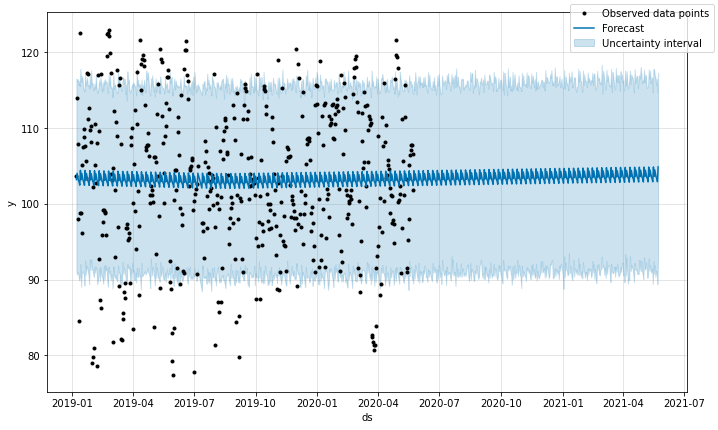

In [121]:
fig1 = model.plot(prediction)
fig1.legend()

In [122]:
fig = go.Figure([go.Scatter(x=df['ds'], y=df['y'],mode='lines',
                    name='Actual')])

fig.add_trace(go.Scatter(x=prediction['ds'], y=prediction['yhat'],
                   mode='lines+markers',
                    name='predicted'))

fig.show()

In [123]:
#Return a Numpy representation of the DataFrame.
y_true = df['y'].values

#Here we have specified [:498] because in y_true we have 498 data points so for comparing both series we need equal shape of series.
y_pred = prediction['yhat'][:498].values 

mae = mean_absolute_error(y_true, y_pred)
print('Mean Absolute Error: %.3f' % mae)

Mean Absolute Error: 7.910


In [124]:
model1=Prophet(daily_seasonality=True).add_seasonality(name='yearly',period=365, fourier_order=70)

In [125]:
model1.fit(df)

23:35:21 - cmdstanpy - INFO - Chain [1] start processing
23:35:21 - cmdstanpy - INFO - Chain [1] done processing


In [126]:
model1.component_modes

{'additive': ['yearly',
  'weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [127]:
future_dates1=model1.make_future_dataframe(periods=365)

In [128]:
prediction1=model1.predict(future_dates1)

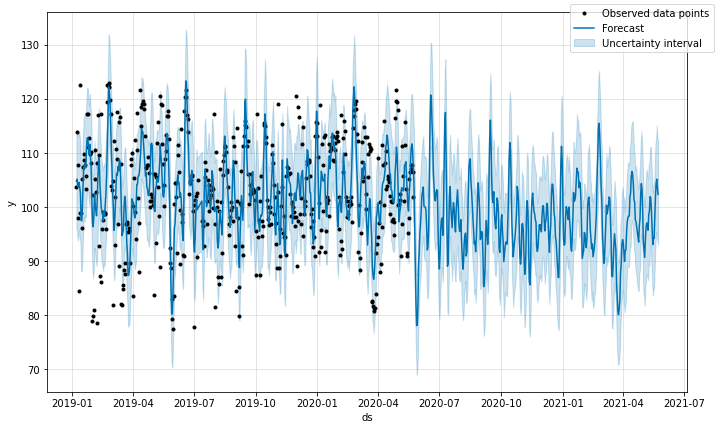

In [129]:
fig2 = model.plot(prediction1)
fig2.legend()

In [130]:
from sklearn.metrics import mean_absolute_error
y_true = df['y'].values
y_pred = prediction1['yhat'][:498].values
mae = mean_absolute_error(y_true, y_pred)
print('Mean Absolute Error: %.3f' % mae)

Mean Absolute Error: 5.600


In [131]:
import plotly.graph_objects as go
fig = go.Figure([go.Scatter(x=df['ds'], y=df['y'],mode='lines',
                    name='Actual')])

fig.add_trace(go.Scatter(x=prediction1['ds'], y=prediction1['yhat'],
                   mode='lines+markers',
                    name='predicted'))

fig.show()
